---
# Capítulo 2: Supervised Learning
---

## Classification and Regression

There are two major types of supervised machine learning problems, called classification and regression.

En clasificación el objetivo es predecir correctamente a que clase pertenecen los objetos a evaluar, uno de los métodos utilizados para determinar dichas clases es la clasificación binaria definida en la siguiente celda.

En el caso de la regresión el objetivo es predecir un número continuo (Un numero con coma flotante también llamado un número real en matemáticas, algunos ejemplos se listan más adelante.

**La forma mas facil de distinguir entre un modelo de clasificación y uno de regresión es preguntar si existe alguna clase de continuidad en el resultado.**

### Clasificación binaria

Se puede pensar en la clasificación binaria como un intento de responder una pregunta de si o no al momento de clasificar un objeto entre dos clases; por ejemplo clasificar si un email es spam o no. Este tipo de clasificación también se puede extender a solucionar problemas de clasificación múltiple; por ejemplo determinar en qué idioma está escrita una página web.

### Ejemplos de regresión

- Predecir el ingreso anual de una persona basado en su educación, edad y lugar de residencia:

- Predecir el rendimiento de un campo de maiz a partir del clima, otros campos parecidos y el numero de trabajadores de la granja.

Es importante anotar que el resultado esperado es un valor numérico en un intervalo determinado y continuo (el ingreso anual o el rendimiento del campo de maíz), mientras que el e caso de la clasificación se espera un resultado discreto.


## Generalization, Overfitting, and Underfitting

In supervised learning, we want to build a model on the training data and then be able to make accurate predictions on new, unseen data that has the same characteristics as the training set that we used. If a model is able to make  accurate predictions on unseen data, we say it is able to generalize from the training set to the test set. We want to build a model that is able to generalize as accurately as possible.

### Overfitting

Construir modelos muy complejos para la cantidad de información que se tiene es llamado overfitting (sobreajuste).

El Overfitting ocurre cuando el modelo se entrena de forma muy cercana a las particularidades del conjunto de entrenamientos, debido a esto el modelo obtenido va a generalizar muy bien en el conjunto de datos de entrenamiento pero no obtendra buenos resultados para datos nuevos.

### Underfitting

Si el modelo es muy simple, osea que no toma lo suficientemente en cuenta las particularidades del conjunto de entrenamiento, sucedera que el modelo no logrará capturar todos los aspectos y variabilidad de los datos, es probable que no se logren buenos resultados en el conjunto de entrenamiento y tampoco una buena generalización para nuevos datos, este comportamiento recibe el nombre de underfitting (desajuste).

Mientras mas complejo sea el modelo, mejor será su capacidad de realizar predicciones en el conjunto de entrenamiento, sin embargo, si nuestro modelo se torna "demasiado complejo" nos estaremos enfocando más de la cuenta en cada punto individual de nuestro conjunto de entrenamiento y el modelo no va a generalizar bien nuevos datos.

Existe un punto medio o adecuado entre la complejidad del modelo y los datos evaluados en el cual se obtendra el mejor desempeño a la hora de generalizar.

### Relation of Model Complexity to Dataset Size

It’s important to note that model complexity is intimately tied to the variation of inputs contained in your training dataset: the larger variety of data points your dataset contains, the more complex a model you can use without overfitting. Usually, collecting more data points will yield more variety, so larger datasets allow building more complex models. However, simply duplicating the same data points or collecting very similar data will not help.

## Supervised Machine Learning Algorithms

We will now review the most popular machine learning algorithms and explain how
they learn from data and how they make predictions. We will also discuss how the
concept of model complexity plays out for each of these models, and provide an overview of how each algorithm builds a model. 

### Some Sample Datasets

We will use several datasets to illustrate the different algorithms. Some of the datasets
will be small and synthetic (meaning made-up), designed to highlight particular
aspects of the algorithms. Other datasets will be large, real-world examples.

#### Forge dataset

An example of a synthetic two-class classification dataset is the forge dataset, which has two features. The following code creates a scatter plot (Figure 2-2) visualizing all of the data points in this dataset. The plot has the first feature on the x-axis and the
second feature on the y-axis. As is always the case in scatter plots, each data point is represented as one dot. The color and shape of the dot indicates its class.

X.shape: (26, 2)


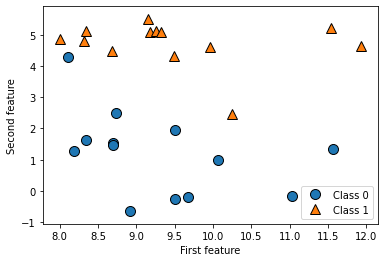

In [3]:
import mglearn
import matplotlib.pyplot as plt
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

#### synthetic wave dataset

To illustrate regression algorithms, we will use the synthetic wave dataset. The wave dataset has a single input feature and a continuous target variable (or response) that
we want to model. The plot created here (Figure 2-3) shows the single feature on the x-axis and the regression target (the output) on the y-axis.

Text(0, 0.5, 'Target')

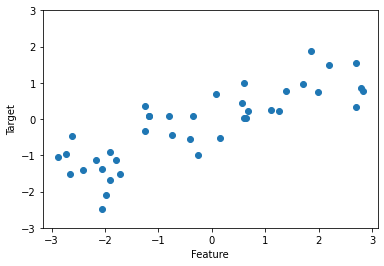

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

#### Wisconsin Breast Cancer dataset

Records clinical measurements of breast cancer tumors. Each tumor
is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors),
and the task is to learn to predict whether a tumor is malignant based on the meas‐
urements of the tissue.

In [6]:
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Feature names:\n{}".format(cancer.feature_names))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### Boston Housing dataset

The task associated with this dataset is to predict the median value of homes in several Boston neighborhoods in the 1970s, using information such as crime rate, proximity to the Charles River, highway accessibility, and so on. The dataset contains 506 data points, described by 13 features.

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

Data shape: (506, 13)
X.shape: (506, 104)


The resulting 104 features are the 13 original features together with the 91 possible
combinations of two features within those 13.5.

This is called the binomial coefficient, which is the number of combinations of k elements that can be selected from a set of n elements. Often this is written as n kand spoken as “n choose k”—in this case, “13 choose 2.”

#### k-Nearest Neighbors

The k-NN algorithm is arguably the simplest machine learning algorithm. Building
the model consists only of storing the training dataset. To make a prediction for a
new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”

#### k-Neighbors classification

In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for. The prediction is then simply the known output for this training point. the following plot illustrates this for the case of classification on the forge dataset:

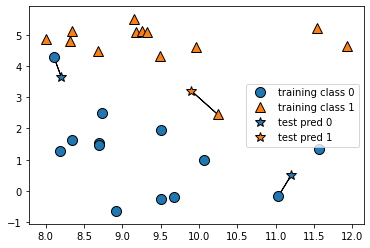

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Instead of considering only the closest neighbor, we can also consider an arbitrary number, k, of neighbors. This is where the name of the k-nearest neighbors algorithm comes from. When considering more than one neighbor, we use voting to assign a
label.

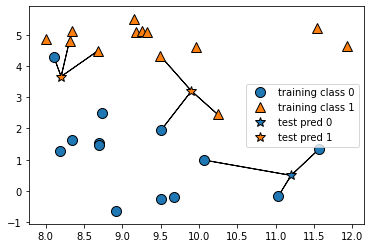

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [12]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [14]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


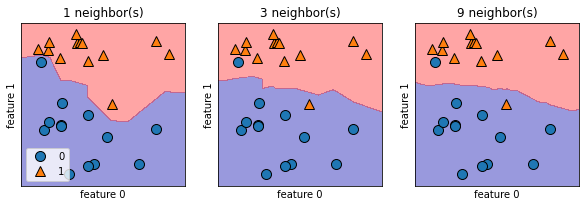

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1],y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

### Linear Models

## Uncertainty Estimates from Classifiers